In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('index_1.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [118]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [119]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.set_index('date',inplace=True)
df.head()

,datetime,cash_type,card,money,coffee_name,month,day
date,,,,,,,
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1


In [120]:
#clean data
print(df.isna().sum())
print(df.duplicated().sum())
df['card'].fillna('XXXX-XXXX-XXXX-XXXX',inplace=True)

datetime        0
cash_type       0
card           89
money           0
coffee_name     0
month           0
day             0
dtype: int64
0


C:\Users\momen\AppData\Local\Temp\ipykernel_15340\1683250539.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('XXXX-XXXX-XXXX-XXXX',inplace=True)


<Axes: xlabel='date'>

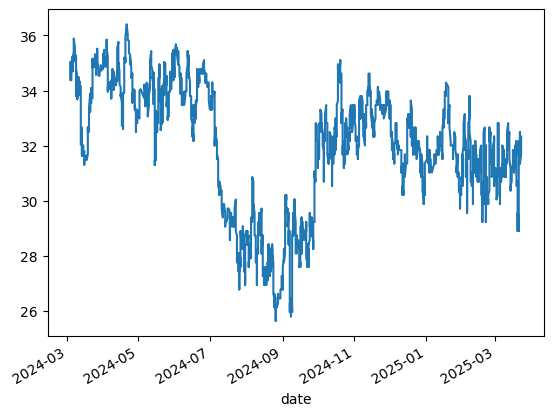

In [121]:
df['money_30d_mean'] = df['money'].rolling(30).mean()
df['money_30d_mean'].plot() 

<Axes: xlabel='date'>

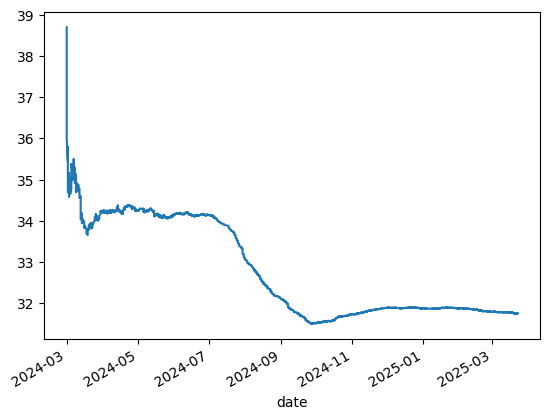

In [122]:
df['momney_expanding_mean']  = df['money'].expanding().mean()
df['momney_expanding_mean'].plot()

<Axes: xlabel='date'>

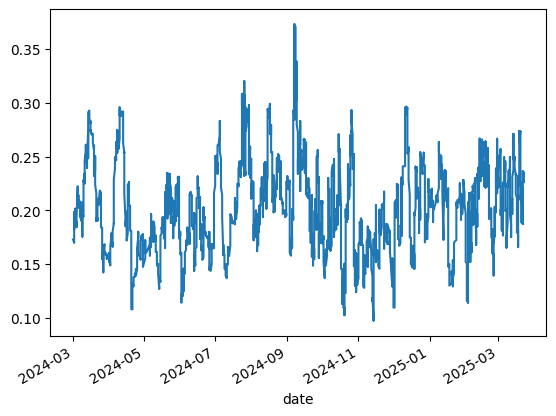

In [123]:
df['money_std'] = df['money'].pct_change().rolling(30,min_periods=10 ).std()
df['money_std'].plot()

In [124]:
df['money_lag1']=df['money'].shift(1)
df['temp_diff'] = df['money'] - df['money_lag1']
monthly_dif=df['temp_diff'].resample("M").sum()

C:\Users\momen\AppData\Local\Temp\ipykernel_15340\3745887322.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dif=df['temp_diff'].resample("M").sum()


<Axes: xlabel='date', ylabel='temp_diff'>

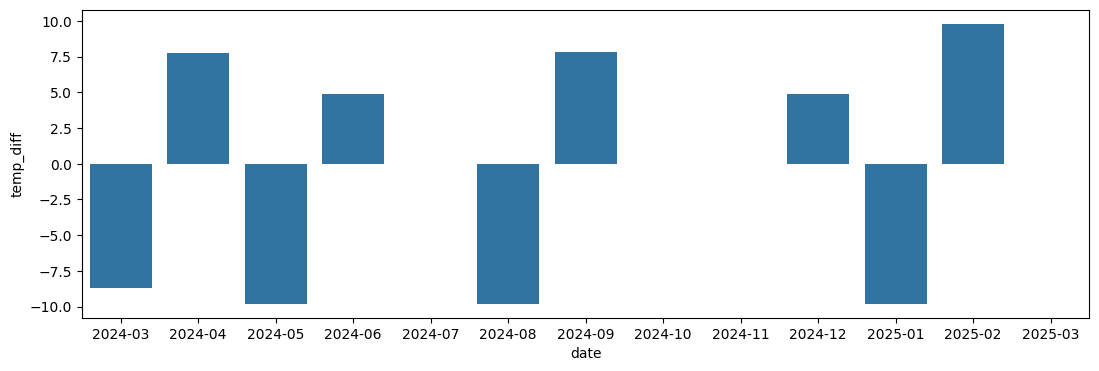

In [125]:
mont=monthly_dif.to_period()
mont
plt.figure(figsize=(13,4))
sns.barplot(data=mont)

<Axes: xlabel='month', ylabel='money'>

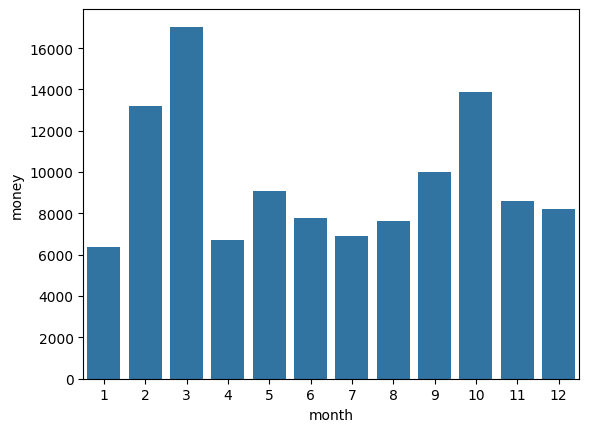

In [126]:
#df[]
mont_sales=df.groupby('month')['money'].sum()
sns.barplot(data=mont_sales)


<Axes: xlabel='day', ylabel='money'>

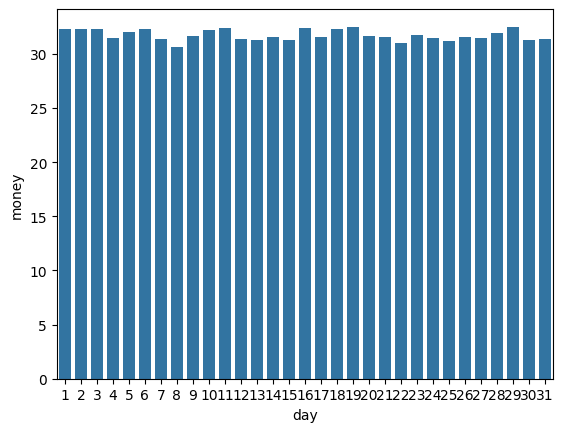

In [127]:
avg_income_per_day = df.groupby('day')['money'].mean()
sns.barplot(data = avg_income_per_day)

In [128]:
df['datetime'].dt.hour

date
2024-03-01    10
2024-03-01    12
2024-03-01    12
2024-03-01    13
2024-03-01    13
              ..
2025-03-23    10
2025-03-23    14
2025-03-23    14
2025-03-23    15
2025-03-23    18
Name: datetime, Length: 3636, dtype: int32

In [129]:
#hours 
df['hour']=df['datetime'].dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['hours_labels']=pd.cut(df['hour'],bins=bins,labels=labels)
df.head()

,datetime,cash_type,card,money,coffee_name,month,day,money_30d_mean,momney_expanding_mean,money_std,money_lag1,temp_diff,hour,hours_labels
date,,,,,,,,,,,,,,
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1,NaN,38.70,NaN,NaN,NaN,10,Morning
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,NaN,38.70,NaN,38.7,0.0,12,Morning
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,NaN,38.70,NaN,38.7,0.0,12,Morning
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1,NaN,36.25,NaN,38.7,-9.8,13,Afternoon
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1,NaN,36.74,NaN,28.9,9.8,13,Afternoon


hours_labels
Night          149.40
Morning      44899.42
Afternoon    46545.78
Evening      23836.98
Name: money, dtype: float64


C:\Users\momen\AppData\Local\Temp\ipykernel_15340\4162320912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_income=df.groupby('hours_labels')['money'].sum()


([<matplotlib.patches.Wedge at 0x22948b151d0>,
 [Text(1.099990906861648, 0.0044726750037533776, 'Night'),
  Text(0.367539619002589, 1.0367808970382468, 'Morning'),
  Text(-0.9217313770986444, -0.6003426258994414, 'Afternoon'),
  Text(0.8765251232932464, -0.6646079357303518, 'Evening')],
 [Text(0.5999950401063534, 0.002439640911138206, '0.1%'),
  Text(0.200476155819594, 0.5655168529299528, '38.9%'),
  Text(-0.5027625693265332, -0.32745961412696806, '40.3%'),
  Text(0.47810461270540705, -0.3625134194892828, '20.7%')])

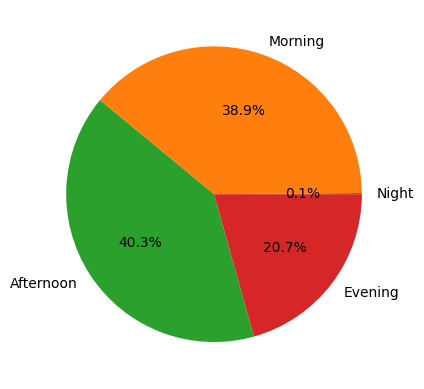

In [134]:
time_income=df.groupby('hours_labels')['money'].sum()
print(time_income)
plt.pie(time_income.values,labels=labels,autopct='%.1f%%')

<Axes: xlabel='coffee_name', ylabel='money'>

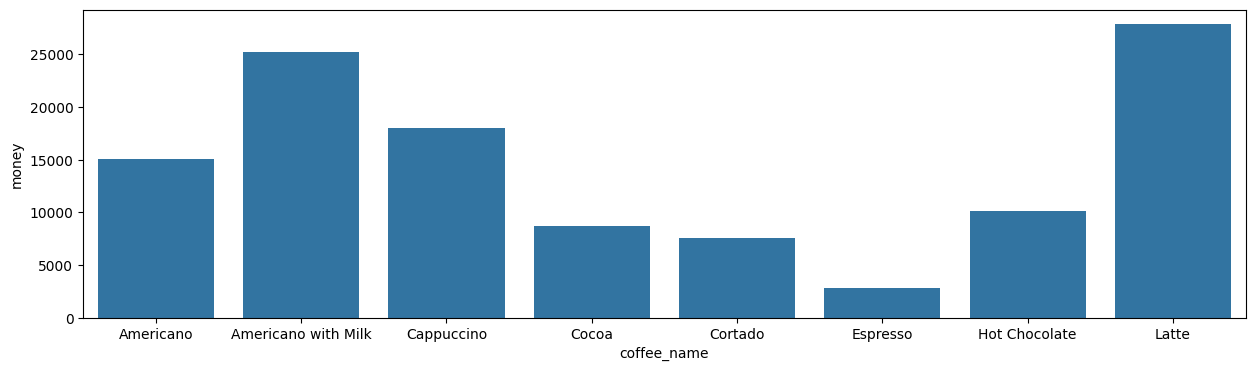

In [141]:
coffee_sales=df.groupby('coffee_name')['money'].sum()
plt.figure(figsize=(15,4))
sns.barplot(data=coffee_sales)

([<matplotlib.patches.Wedge at 0x22949561c10>,
 [Text(-1.0958673122120068, 0.09526192327069687, 'card'),
  Text(1.0958673205400649, -0.09526182746692954, 'cash')],
 [Text(-0.5977458066610946, 0.05196104905674374, '97.2%'),
  Text(0.5977458112036717, -0.051960996800143384, '2.8%')])

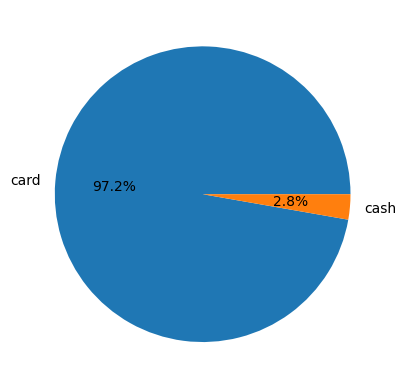

In [150]:
cash_t=df.groupby('cash_type')['money'].sum()
plt.pie(cash_t.values,labels=cash_t.index,autopct='%.1f%%')